A quick little import and function definition to snag the lat/long from the postal code:

In [31]:
import geocoder # import geocoder

In [3]:
def ll_from_postcode(postal_code):
    """
    Fed a postal_code in the form supplied to the existing pandas dataframe 
    scraped from Canada's "M"---Toronto, Ontario---codes, this function 
    returns the lat/long coordinates of the center of that postal_code. These
    are returned in an ordered pair, so that one can use
    lat, long = ll_from_postcode(postal_code).
    
    The data is obtained by Google Maps Geocoding API.
    """
    # initialize your variable to None
    lat_lng_coords = None

    # loop until you get the coordinates
    # I've added a counter just to see what's happening...
    i = 0
    while(lat_lng_coords is None):
        g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
        i += 1
        print("request {}: {}".format(i, g))
        lat_lng_coords = g.latlng

    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    return latitude, longitude

In [4]:
m4alat, m4along = ll_from_postcode("M4A")

request 1: <[REQUEST_DENIED] Google - Geocode [empty]>
request 2: <[REQUEST_DENIED] Google - Geocode [empty]>
request 3: <[REQUEST_DENIED] Google - Geocode [empty]>
request 4: <[REQUEST_DENIED] Google - Geocode [empty]>
request 5: <[REQUEST_DENIED] Google - Geocode [empty]>
request 6: <[REQUEST_DENIED] Google - Geocode [empty]>
request 7: <[REQUEST_DENIED] Google - Geocode [empty]>
request 8: <[REQUEST_DENIED] Google - Geocode [empty]>
request 9: <[REQUEST_DENIED] Google - Geocode [empty]>
request 10: <[REQUEST_DENIED] Google - Geocode [empty]>


KeyboardInterrupt: 

Lots of REQUEST_DENIED, at least from my home machine. I'll just use the supplied geospatial data csv:

In [32]:
import csv
import os
geoCSVpath = os.path.join(r'.', 'Geospatial_Coordinates.csv')
with open(geoCSVpath, mode='r') as infile:
    reader = csv.reader(infile,)
    next(reader, None)              # I want to skip the first row, which contains a header
    coord_dict = {rows[0]:(float(rows[1]), float(rows[2])) for rows in reader}
    
print(coord_dict)

{'M1B': (43.8066863, -79.1943534), 'M1C': (43.7845351, -79.1604971), 'M1E': (43.7635726, -79.1887115), 'M1G': (43.7709921, -79.2169174), 'M1H': (43.773136, -79.2394761), 'M1J': (43.7447342, -79.2394761), 'M1K': (43.7279292, -79.2620294), 'M1L': (43.7111117, -79.2845772), 'M1M': (43.716316, -79.2394761), 'M1N': (43.692657, -79.2648481), 'M1P': (43.7574096, -79.273304), 'M1R': (43.7500715, -79.2958491), 'M1S': (43.7942003, -79.2620294), 'M1T': (43.7816375, -79.3043021), 'M1V': (43.8152522, -79.2845772), 'M1W': (43.7995252, -79.3183887), 'M1X': (43.8361247, -79.2056361), 'M2H': (43.8037622, -79.3634517), 'M2J': (43.7785175, -79.3465557), 'M2K': (43.7869473, -79.385975), 'M2L': (43.7574902, -79.3747141), 'M2M': (43.789053, -79.4084928), 'M2N': (43.7701199, -79.4084928), 'M2P': (43.7527583, -79.4000493), 'M2R': (43.7827364, -79.4422593), 'M3A': (43.7532586, -79.3296565), 'M3B': (43.7459058, -79.352188), 'M3C': (43.7258997, -79.340923), 'M3H': (43.7543283, -79.4422593), 'M3J': (43.7679803, -

Now I can just access the lat/long pair directly.   
E.g.  >>> coord_dict['M6E']  
        (43.6890256, -79.453512)

Now I'll import the previously-generated pandas dataframe:

In [33]:
import pandas as pd
df = pd.read_csv(os.path.join(r".", "Toronto_Boroughs_part_1.csv"))

In [34]:
df = df.drop(df.columns[[0]], axis = 1)

In [35]:
df

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,Business reply mail Processing CentrE
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


Build lat- and long-lists based on the dictionary, accessed *in the order the PostalCodes appear in the dataframe*:

In [36]:
lat_list = [coord_dict[x][0] for x in df["PostalCode"]]
long_list = [coord_dict[x][1] for x in df["PostalCode"]]

Now bang those on the dataframe:

In [37]:
df["Latitude"] = lat_list
df["Longitude"] = long_list

In [38]:
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,Business reply mail Processing CentrE,43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


## Now for some mapping and clustering...

In [39]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### Toronto with neighborhoods superimposed

In [13]:
# Choosing "M5A" as "Downtown Toronto" and centering there:
map_toronto = folium.Map(location = coord_dict["M5A"], zoom_start = 10)

In [14]:
for lat, lng, borough, neighborhood in zip(
                                            df['Latitude'], 
                                            df['Longitude'], 
                                            df['Borough'],
                                            df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)

In [15]:
map_toronto

#### Foursquare Credentials

In [40]:
CLIENT_ID = 'TRYODPKC2T0LFB2ENCRPVR1MTTGHXOEJZRODBKMWN4D4MZFF' # your Foursquare ID
CLIENT_SECRET = 'GX44A3BDL2BNOM2IHG3GL3XPVFATRS3A1BP0XG1HI4ECZKQ5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
RADIUS = '10000'
LIMIT = '50'

### Reproducing the Manhattan exploration

In [41]:
# Taking just those boroughs which have "Toronto" in the name:
toronto_data = df[df['Borough'].str.contains('Toronto')].reset_index(drop=True)
toronto_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [42]:
# Choosing "M5A" as "Downtown Toronto" and centering there:
new_map_toronto = folium.Map(location = coord_dict["M5A"], zoom_start = 11)

In [43]:
for lat, lng, borough, neighborhood in zip(
                                            toronto_data['Latitude'], 
                                            toronto_data['Longitude'], 
                                            toronto_data['Borough'],
                                            toronto_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='gray',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(new_map_toronto)

In [20]:
new_map_toronto

In [44]:
LIMIT = 50
# N.B.: a RADIUS of 3000 meters is far too large: it will find a LOT of overlaps between Postal Codes, and thus makes mapping things 
# rather difficult later on. 
# For many fewer overlaps, I won't search beyond 1000 meters radius
RADIUS = 1000
print("There are {} post codes in the toronto_data dataframe; \n I'll find the top {} venues in each one, limited to \n {} meters' radius from each center".format(toronto_data.shape[0],
                                                                                                    LIMIT,
                                                                                                    RADIUS))


There are 39 post codes in the toronto_data dataframe; 
 I'll find the top 50 venues in each one, limited to 
 1000 meters' radius from each center


In [45]:
# A function to help assemble the 4Square urls. The parameters are mostly already defined in the running kernel.
def assemble_request_url(row_index, df = toronto_data, endpoint = 'explore', search_term = "coffee", limit = LIMIT ):
    if endpoint == 'search':
        query_string = '&query={}'.format(search_term)
        intent_string = '&intent=checkin'
    else:
        query_string = ''
        intent_string = ''
    n_lat, n_long = (df.iloc[row_index]["Latitude"], df.iloc[row_index]["Longitude"])
    base_url = "https://api.foursquare.com/v2/venues/"+endpoint
    auth_string = "?&client_id={}&client_secret={}&v={}".format(CLIENT_ID, CLIENT_SECRET, VERSION)
    radius_string = "&ll={},{}&radius={}".format(n_lat, n_long, RADIUS)
    limit_string = '&limit={}'.format(LIMIT)
        
    return base_url + auth_string + radius_string + limit_string + intent_string + query_string

In [46]:
assemble_request_url(1, endpoint = 'explore')

'https://api.foursquare.com/v2/venues/explore?&client_id=TRYODPKC2T0LFB2ENCRPVR1MTTGHXOEJZRODBKMWN4D4MZFF&client_secret=GX44A3BDL2BNOM2IHG3GL3XPVFATRS3A1BP0XG1HI4ECZKQ5&v=20180605&ll=43.6623015,-79.3894938&radius=1000&limit=50'

In [47]:
toronto_data.iloc[4]["PostalCode"]

'M4E'

In [48]:
# Here, 'results' is a dictionary, with keys being the postcodes:
results = {}
for row in range(len(toronto_data)):
    # create URL
    url = assemble_request_url(row)
    req = requests.get(url).json()
    vens = req.get('response')
    print(row)           # because it takes a while; track it's making progress!
    results[toronto_data.iloc[row]["PostalCode"]] = vens
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38


In [49]:
results['M5A'].get('groups')[0].get('items')[0].get('venue')

{'id': '54ea41ad498e9a11e9e13308',
 'name': 'Roselle Desserts',
 'location': {'address': '362 King St E',
  'crossStreet': 'Trinity St',
  'lat': 43.653446723052674,
  'lng': -79.3620167174383,
  'labeledLatLngs': [{'label': 'display',
    'lat': 43.653446723052674,
    'lng': -79.3620167174383}],
  'distance': 143,
  'postalCode': 'M5A 1K9',
  'cc': 'CA',
  'city': 'Toronto',
  'state': 'ON',
  'country': 'Canada',
  'formattedAddress': ['362 King St E (Trinity St)',
   'Toronto ON M5A 1K9',
   'Canada']},
 'categories': [{'id': '4bf58dd8d48988d16a941735',
   'name': 'Bakery',
   'pluralName': 'Bakeries',
   'shortName': 'Bakery',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_',
    'suffix': '.png'},
   'primary': True}],
 'photos': {'count': 0, 'groups': []}}

In [50]:
results['M5A'].keys()

dict_keys(['suggestedFilters', 'headerLocation', 'headerFullLocation', 'headerLocationGranularity', 'totalResults', 'suggestedBounds', 'groups'])

In [51]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [52]:
get_category_type(results['M7A'].get('groups')[0].get('items')[0].get('venue'))

'Park'

#### Before I screw things up and have to import things yet again, I'll shove the dict into a local json file...

In [53]:
import json
fourSquareJSONpath = os.path.join(r'.', 'FourSquareDictionary_Another_round.json')
with open(fourSquareJSONpath, 'w') as fp:
    json.dump(results, fp)

## JSON cleanup. Convert "results" dictionary into a list of pandas dataframes.

In [54]:
results.keys()

dict_keys(['M5A', 'M7A', 'M5B', 'M5C', 'M4E', 'M5E', 'M5G', 'M6G', 'M5H', 'M6H', 'M5J', 'M6J', 'M4K', 'M5K', 'M6K', 'M4L', 'M5L', 'M4M', 'M4N', 'M5N', 'M4P', 'M5P', 'M6P', 'M4R', 'M5R', 'M6R', 'M4S', 'M5S', 'M6S', 'M4T', 'M5T', 'M4V', 'M5V', 'M4W', 'M5W', 'M4X', 'M5X', 'M4Y', 'M7Y'])

In [55]:
from pandas.io.json import json_normalize

In [56]:
[key for key in results]

['M5A',
 'M7A',
 'M5B',
 'M5C',
 'M4E',
 'M5E',
 'M5G',
 'M6G',
 'M5H',
 'M6H',
 'M5J',
 'M6J',
 'M4K',
 'M5K',
 'M6K',
 'M4L',
 'M5L',
 'M4M',
 'M4N',
 'M5N',
 'M4P',
 'M5P',
 'M6P',
 'M4R',
 'M5R',
 'M6R',
 'M4S',
 'M5S',
 'M6S',
 'M4T',
 'M5T',
 'M4V',
 'M5V',
 'M4W',
 'M5W',
 'M4X',
 'M5X',
 'M4Y',
 'M7Y']

In [57]:
# Rather than worrying whether lists are built in the same order each time, I'll just use 
# a SortedDict, with keys the PostalCodes:
from sortedcontainers import SortedDict
results = SortedDict(results)
venues_dict = {key: results[key]['groups'][0]['items'] for key in results if results[key]}

In [58]:
# flatten the JSON structure:
nearby_venues = {key: pd.json_normalize(venues_dict[key]) for key in venues_dict}
# now each entry in the nearby_venues list is a pandas dataframe

In [59]:
for key in results:
    print("length {}:".format(key))
    if not results[key]:
        print("empty")
    else:
        print("{}".format(len(results[key]['groups'][0]['items'])))

length M4E:
50
length M4K:
50
length M4L:
50
length M4M:
50
length M4N:
8
length M4P:
50
length M4R:
42
length M4S:
50
length M4T:
50
length M4V:
50
length M4W:
21
length M4X:
34
length M4Y:
50
length M5A:
50
length M5B:
50
length M5C:
50
length M5E:
50
length M5G:
50
length M5H:
50
length M5J:
50
length M5K:
50
length M5L:
50
length M5N:
23
length M5P:
48
length M5R:
50
length M5S:
50
length M5T:
50
length M5V:
15
length M5W:
50
length M5X:
50
length M6G:
50
length M6H:
50
length M6J:
50
length M6K:
50
length M6P:
50
length M6R:
50
length M6S:
50
length M7A:
50
length M7Y:
49


In [60]:
nearby_venues['M7A'].head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.neighborhood
0,e-0-4b9d206bf964a520e69136e3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4b9d206bf964a520e69136e3,Queen's Park,University Ave.,at Wellesley Ave.,43.663946,-79.392180,"[{'label': 'display', 'lat': 43.66394609897775...",283,M5R 2E8,CA,Toronto,ON,Canada,"[University Ave. (at Wellesley Ave.), Toronto ...","[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[],NaN,NaN
1,e-0-5db70a0c306d6b000861ac9f-1,0,"[{'summary': 'This spot is popular', 'type': '...",5db70a0c306d6b000861ac9f,Neo Coffee Bar,770 Bay Street Unit 3,NaN,43.660140,-79.385870,"[{'label': 'display', 'lat': 43.66014, 'lng': ...",378,M5G 0A6,CA,Toronto,ON,Canada,"[770 Bay Street Unit 3, Toronto ON M5G 0A6, Ca...","[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],NaN,NaN
2,e-0-594ff53c2be42528bcc1bdb7-2,0,"[{'summary': 'This spot is popular', 'type': '...",594ff53c2be42528bcc1bdb7,T-Swirl Crepe,510 Yonge Street,NaN,43.663452,-79.384125,"[{'label': 'display', 'lat': 43.663452, 'lng':...",450,M4Y 1X9,CA,Toronto,ON,Canada,"[510 Yonge Street, Toronto ON M4Y 1X9, Canada]","[{'id': '52e81612bcbc57f1066b79f2', 'name': 'C...",0,[],455073193,NaN
3,e-0-4fb593c0e4b05a76e2ab2951-3,0,"[{'summary': 'This spot is popular', 'type': '...",4fb593c0e4b05a76e2ab2951,Como En Casa,565 Yonge St,NaN,43.665160,-79.384796,"[{'label': 'display', 'lat': 43.66516, 'lng': ...",494,M4Y-1Z2,CA,Toronto,ON,Canada,"[565 Yonge St, Toronto ON M4Y-1Z2, Canada]","[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",0,[],NaN,NaN
4,e-0-56637703498eb6bd9dbac796-4,0,"[{'summary': 'This spot is popular', 'type': '...",56637703498eb6bd9dbac796,Wickson Social,5 St. Joseph St,NaN,43.665905,-79.385720,"[{'label': 'display', 'lat': 43.66590450775969...",503,NaN,CA,Toronto,ON,Canada,"[5 St. Joseph St, Toronto ON, Canada]","[{'id': '4bf58dd8d48988d155941735', 'name': 'G...",0,[],NaN,NaN


In [83]:
# Snag just the columns I want
retain = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = {key: nearby_venues[key].loc[:, retain] for key in nearby_venues}

In [84]:
nearby_venues['M7A'].head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Queen's Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",43.663946,-79.392180
1,Neo Coffee Bar,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",43.660140,-79.385870
2,T-Swirl Crepe,"[{'id': '52e81612bcbc57f1066b79f2', 'name': 'C...",43.663452,-79.384125
3,Como En Casa,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",43.665160,-79.384796
4,Wickson Social,"[{'id': '4bf58dd8d48988d155941735', 'name': 'G...",43.665905,-79.385720


In [85]:
# get just the category information I want from the venue.categories column:
for x in nearby_venues:
    nearby_venues[x]['venue.categories'] = nearby_venues[x].apply(get_category_type, axis=1)

In [86]:
nearby_venues['M7A'].head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Queen's Park,Park,43.663946,-79.392180
1,Neo Coffee Bar,Coffee Shop,43.660140,-79.385870
2,T-Swirl Crepe,Creperie,43.663452,-79.384125
3,Como En Casa,Mexican Restaurant,43.665160,-79.384796
4,Wickson Social,Gastropub,43.665905,-79.385720


In [87]:
# Clean up the column names by removing "venue":
for x in nearby_venues:
    nearby_venues[x].columns = [col.split(".")[-1] for col in nearby_venues[x].columns]


In [88]:
nearby_venues['M7A'].head()

,name,categories,lat,lng
0,Queen's Park,Park,43.663946,-79.392180
1,Neo Coffee Bar,Coffee Shop,43.660140,-79.385870
2,T-Swirl Crepe,Creperie,43.663452,-79.384125
3,Como En Casa,Mexican Restaurant,43.665160,-79.384796
4,Wickson Social,Gastropub,43.665905,-79.385720


### NB: It's VERY possible that some of these venues are duplicated across PostalCodes, since the radii searched /might/ lead to overlap between codes.

In [89]:
# Nominally, we'll have 50 venues per postal code, for a total of 
print("nominally, there are {} different venues".format(len(nearby_venues)*len(nearby_venues['M7A'])))

nominally, there are 1950 different venues


In [90]:
# to explore this, I'll extract the venue names into a big list, then form a set, and make sure it's of the same size:
list_of_names = [nearby_venues[key]['name'] for key in nearby_venues]
# flatten this:
from pandas.core.common import flatten
deduplicated_names = list(set(flatten(list_of_names)))

In [91]:
deduplicated_names[0:10]

['Kanto',
 'Regent Park Aquatic Centre',
 'Triple A Bar (AAA)',
 'Mambo Lounge',
 'Leslieville Farmers Market',
 'The Nutty Chocolatier',
 "Rachel's Coffee House",
 'Sam James Coffee Bar (SJCB)',
 'Sofra Mediterranean Cuisine',
 'Souvlaki Hut']

In [92]:
# Ah! many of the names are duplicated
len(deduplicated_names)

1165

In [93]:
def duplicates_in_list(the_list):
    seen = set()
    seen2 = set()
    seen_add = seen.add
    seen2_add = seen2.add
    for item in the_list:
        if item in seen:
            seen2_add(item)
        else:
            seen_add(item)
    return list(seen2)

In [94]:
dupes = duplicates_in_list(list(flatten(list_of_names)))

In [95]:
len(dupes)

323

In [96]:
# Note that, because the length of the "duplicates" list 
# isn't just the original superset length minus 
# the non-duplicates' length, that some names are repeated more 
# than once (triplicates, quadruplicates, etc.). This is easily done
# with venues with common names, or with venues returned in more than one 
# PostalCode.
import random
random.sample(dupes, 10)

['Schmaltz Appetizing',
 'Hanji',
 'The Ritz-Carlton',
 'DanceLifeX Centre',
 'Pai',
 'Neo Coffee Bar',
 'UNIQLO ユニクロ',
 'Meridian Hall',
 'Loblaws',
 'Everyday Gourmet (Teas & Coffees)']

In [97]:
# I'm interested in how easy it is to assemble the counts of each appearance. It may be O(n^2) for a naiive approach,
# though there's probably an asymptotically better algorithm. For now I'll just brute-force it:
concat_near_venues = pd.concat(nearby_venues)

In [98]:
len(concat_near_venues)

1790

In [99]:
concat_near_venues.head(24)

name                     categories  \
M4E 0                    Glen Manor Ravine                          Trail   
    1                      Tori's Bakeshop  Vegetarian / Vegan Restaurant   
    2                    Beaches Bake Shop                         Bakery   
    3                       The Beech Tree                      Gastropub   
    4                      The Fox Theatre            Indie Movie Theater   
    5                      Ed's Real Scoop                 Ice Cream Shop   
    6                       Bagels On Fire                     Bagel Shop   
    7                      Mastermind Toys               Toy / Game Store   
    8                       Veloute Bistro              French Restaurant   
    9                         Beacher Cafe                 Breakfast Spot   
    10                 The Remarkable Bean                    Coffee Shop   
    11                    The Feathers Pub                            Pub   
    12                         Kew Gardens                           Park   
    13  The Big Carrot Natural Food Market              Health Food Store   
    14                    I'm On The Beach                          Beach   
    15                                Xola             Mexican Restaurant   
    16                         Balmy Beach                          Beach   
    17      Isabella’s Boutique Restaurant            Japanese Restaurant   
    18                        The Ten Spot                     Nail Salon   
    19                    Sanna's Farmacia                      Juice Bar   
    20                    The Fill Station                            Pub   
    21                            Vi Vetha                 Breakfast Spot   
    22                         Yumei Sushi            Japanese Restaurant   
    23                     Castro's Lounge                            Bar   

              lat        lng  
M4E 0   43.676821 -79.293942  
    1   43.672114 -79.290331  
    2   43.680363 -79.289692  
    3   43.680493 -79.288846  
    4   43.672801 -79.287272  
    5   43.672630 -79.287993  
    6   43.672864 -79.286784  
    7   43.671453 -79.293971  
    8   43.672267 -79.289584  
    9   43.671938 -79.291238  
    10  43.672801 -79.287038  
    11  43.680501 -79.287522  
    12  43.669038 -79.298538  
    13  43.678879 -79.297734  
    14  43.670364 -79.284696  
    15  43.672603 -79.288080  
    16  43.668169 -79.291355  
    17  43.673767 -79.282703  
    18  43.670340 -79.299363  
    19  43.670929 -79.295969  
    20  43.673256 -79.284943  
    21  43.673720 -79.282155  
    22  43.671108 -79.295064  
    23  43.671104 -79.295107

In [100]:
# I'll use a venue_name: count dictionary to look for 
# repeated names, and simply increment a count:
count_dict = {}
for index, row in concat_near_venues.iterrows():
    venue_name = row["name"]
    # If the exact duplicate is already in the count_dict, just increment its count:
    if venue_name in count_dict:
        count_dict[venue_name] +=1
    # otherwise, add the name in, and set its count to 1:
    else:
        count_dict[venue_name] = 1
    

In [101]:
len(count_dict)

1165

In [102]:
count_dict

{'Glen Manor Ravine': 1,
 "Tori's Bakeshop": 1,
 'Beaches Bake Shop': 1,
 'The Beech Tree': 1,
 'The Fox Theatre': 1,
 "Ed's Real Scoop": 3,
 'Bagels On Fire': 1,
 'Mastermind Toys': 2,
 'Veloute Bistro': 1,
 'Beacher Cafe': 1,
 'The Remarkable Bean': 1,
 'The Feathers Pub': 1,
 'Kew Gardens': 1,
 'The Big Carrot Natural Food Market': 1,
 "I'm On The Beach": 1,
 'Xola': 1,
 'Balmy Beach': 1,
 'Isabella’s Boutique Restaurant': 1,
 'The Ten Spot': 1,
 "Sanna's Farmacia": 1,
 'The Fill Station': 1,
 'Vi Vetha': 1,
 'Yumei Sushi': 1,
 "Castro's Lounge": 1,
 'Life Is Sweet': 1,
 'Cool Runnings': 1,
 'Green Eggplant': 1,
 'LCBO': 12,
 'Kew Gardens Play Park': 1,
 'Pippins Tea Company': 1,
 'DAVIDsTEA': 16,
 'Sunset Grill': 1,
 'COBS Bread': 5,
 'Delhi Bistro': 1,
 'Shoppers Drug Mart': 8,
 'The Green Dragon': 1,
 'Green Basil': 1,
 'The Nutty Chocolatier': 1,
 'The Real Jerk Beaches': 1,
 'Foodland - Toronto': 1,
 'No Bull Burger': 1,
 'Subway': 8,
 'Kyouka Ramen': 1,
 'Grinder': 1,
 'Outrig

In [103]:
sum(list(count_dict.values()))

1790

#### This, too, I'll export to a local file:

In [66]:
count_dict_path = os.path.join(r'.', 'count_dict.txt')
with open(count_dict_path, 'w', encoding='utf-8') as fp:
    fp.write( str(count_dict))
fp.close()

In [104]:
concat_near_venues.index

MultiIndex([('M4E',  0),
            ('M4E',  1),
            ('M4E',  2),
            ('M4E',  3),
            ('M4E',  4),
            ('M4E',  5),
            ('M4E',  6),
            ('M4E',  7),
            ('M4E',  8),
            ('M4E',  9),
            ...
            ('M7Y', 39),
            ('M7Y', 40),
            ('M7Y', 41),
            ('M7Y', 42),
            ('M7Y', 43),
            ('M7Y', 44),
            ('M7Y', 45),
            ('M7Y', 46),
            ('M7Y', 47),
            ('M7Y', 48)],
           length=1790)

In [106]:
def rand_cmap(nlabels, type='bright', first_color_black=True, last_color_black=False, verbose=True):
    """
    Creates a random colormap to be used together with matplotlib. Useful for segmentation tasks
    :param nlabels: Number of labels (size of colormap)
    :param type: 'bright' for strong colors, 'soft' for pastel colors
    :param first_color_black: Option to use first color as black, True or False
    :param last_color_black: Option to use last color as black, True or False
    :param verbose: Prints the number of labels and shows the colormap. True or False
    :return: colormap for matplotlib
    """
    from matplotlib.colors import LinearSegmentedColormap
    import colorsys
    import numpy as np


    if type not in ('bright', 'soft'):
        print ('Please choose "bright" or "soft" for type')
        return

    if verbose:
        print('Number of labels: ' + str(nlabels))

    # Generate color map for bright colors, based on hsv
    if type == 'bright':
        randHSVcolors = [(np.random.uniform(low=0.0, high=1),
                          np.random.uniform(low=0.2, high=1),
                          np.random.uniform(low=0.9, high=1)) for i in range(nlabels)]

        # Convert HSV list to RGB
        randRGBcolors = []
        for HSVcolor in randHSVcolors:
            randRGBcolors.append(colorsys.hsv_to_rgb(HSVcolor[0], HSVcolor[1], HSVcolor[2]))

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]

        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Generate soft pastel colors, by limiting the RGB spectrum
    if type == 'soft':
        low = 0.6
        high = 0.95
        randRGBcolors = [(np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high)) for i in range(nlabels)]

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]
        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Display colorbar
    if verbose:
        from matplotlib import colors, colorbar
        from matplotlib import pyplot as plt
        fig, ax = plt.subplots(1, 1, figsize=(15, 0.5))

        bounds = np.linspace(0, nlabels, nlabels + 1)
        norm = colors.BoundaryNorm(bounds, nlabels)

        cb = colorbar.ColorbarBase(ax, cmap=random_colormap, norm=norm, spacing='proportional', ticks=None,
                                   boundaries=bounds, format='%1i', orientation=u'horizontal')

    return random_colormap

In [ ]:
folium.Marker([lat, lon], 
              popup=str(name)+': '+color+'-'+str(clname), 
              icon=folium.Icon(color=color)
             ).add_to(feature_group)

Number of labels: 39


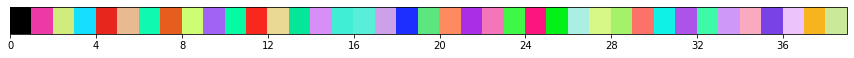

In [107]:
cmap = rand_cmap(39)

In [108]:
# The cmap is a function, and feeding in a real number will return the rgba tuple mapping. For example:
print("{}: {}".format(0, cmap(0)))      # Should be black  (0,0,0,1)
print("{}: {}".format(1, cmap(1)))      # yellowish; about (0.7, 0.95, 0.1, 1)
print("{}: {}".format(32, cmap(32)))    # bluish; about    (0.05, 0.4, 0.95, 1)

0: (0.0, 0.0, 0.0, 1.0)
1: (0.9244350632911283, 0.22357491640788682, 0.6463865728045017, 1.0)
32: (0.2436576158524515, 0.9762718539505331, 0.6596314378753306, 1.0)


In [109]:
# Assemble a PostalCode dictionary, with a mapping to their position in concat_near_venues. These mappings will
# determine the marker colors, via the cmap() function:
pCdict = {}
i = 0
for index, row in concat_near_venues.iterrows():
    if index[0] not in pCdict:
        pCdict[index[0]] = i
        i+=1
        

In [110]:
# As expected, these are already sorted, as that's how 
# concat_near_venues was indexed:
pCdict

{'M4E': 0,
 'M4K': 1,
 'M4L': 2,
 'M4M': 3,
 'M4N': 4,
 'M4P': 5,
 'M4R': 6,
 'M4S': 7,
 'M4T': 8,
 'M4V': 9,
 'M4W': 10,
 'M4X': 11,
 'M4Y': 12,
 'M5A': 13,
 'M5B': 14,
 'M5C': 15,
 'M5E': 16,
 'M5G': 17,
 'M5H': 18,
 'M5J': 19,
 'M5K': 20,
 'M5L': 21,
 'M5N': 22,
 'M5P': 23,
 'M5R': 24,
 'M5S': 25,
 'M5T': 26,
 'M5V': 27,
 'M5W': 28,
 'M5X': 29,
 'M6G': 30,
 'M6H': 31,
 'M6J': 32,
 'M6K': 33,
 'M6P': 34,
 'M6R': 35,
 'M6S': 36,
 'M7A': 37,
 'M7Y': 38}

In [111]:
# Now I can iterate through the rows of concat_near_venues, and add a marker on a map, 
# with marker color depending on the PostalCode. Repeated venues will get different colors.
my_map_toronto = folium.Map(location = coord_dict["M5A"], zoom_start = 10)

In [112]:
# I have to convert the rgba quadruplets into hex, or multiply through by 255, so folium will consume it correctly:
import matplotlib as mpl
for index, row in concat_near_venues.iterrows():
    pCode = index[0]
    name, lat, lng = (row[["name", "lat", "lng"]])
    label = '{}, {}'.format(pCode, name)
    label = folium.Popup(label, parse_html = True)
    fill_color = mpl.colors.to_hex(cmap(pCdict[pCode]), keep_alpha=True)
    fill_opacity = 0.6         # normal opacity
    radius = 5                 # normal circle radius
    # bigger, more opaque circles if the venue name shows up more than once:
    if count_dict[name] > 1:
        fill_opacity = 0.85
        #radius=8
        fill_color = 'red'
    folium.CircleMarker(
            [lat, lng],
            radius=radius,
            popup=label,
            color='grey',
            fill=True,
            fill_color=fill_color,
            fill_opacity=fill_opacity,
            parse_html=True).add_to(my_map_toronto)

In [113]:
my_map_toronto

In [114]:
concat_near_venues.head(24)[['categories']]

categories
M4E 0                           Trail
    1   Vegetarian / Vegan Restaurant
    2                          Bakery
    3                       Gastropub
    4             Indie Movie Theater
    5                  Ice Cream Shop
    6                      Bagel Shop
    7                Toy / Game Store
    8               French Restaurant
    9                  Breakfast Spot
    10                    Coffee Shop
    11                            Pub
    12                           Park
    13              Health Food Store
    14                          Beach
    15             Mexican Restaurant
    16                          Beach
    17            Japanese Restaurant
    18                     Nail Salon
    19                      Juice Bar
    20                            Pub
    21                 Breakfast Spot
    22            Japanese Restaurant
    23                            Bar

In [115]:
# one-hot encoding for venue categories:
concat_onehot = pd.get_dummies(concat_near_venues[['categories']], prefix="", prefix_sep = "")

In [116]:
concat_onehot.head()

Airport  American Restaurant  Amphitheater  Antique Shop  Aquarium  \
M4E 0        0                    0             0             0         0   
    1        0                    0             0             0         0   
    2        0                    0             0             0         0   
    3        0                    0             0             0         0   
    4        0                    0             0             0         0   

       Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
M4E 0            0           0                    0                 0   
    1            0           0                    0                 0   
    2            0           0                    0                 0   
    3            0           0                    0                 0   
    4            0           0                    0                 0   

       Athletics & Sports  BBQ Joint  Bagel Shop  Bakery  Bank  Bar  \
M4E 0                   0          0           0       0     0    0   
    1                   0          0           0       0     0    0   
    2                   0          0           0       1     0    0   
    3                   0          0           0       0     0    0   
    4                   0          0           0       0     0    0   

       Baseball Stadium  Basketball Stadium  Beach  Beach Bar  Beer Bar  \
M4E 0                 0                   0      0          0         0   
    1                 0                   0      0          0         0   
    2                 0                   0      0          0         0   
    3                 0                   0      0          0         0   
    4                 0                   0      0          0         0   

       Beer Store  Belgian Restaurant  Bistro  Bookstore  Boutique  \
M4E 0           0                   0       0          0         0   
    1           0                   0       0          0         0   
    2           0                   0       0          0         0   
    3           0                   0       0          0         0   
    4           0                   0       0          0         0   

       Brazilian Restaurant  Breakfast Spot  Brewery  Bubble Tea Shop  \
M4E 0                     0               0        0                0   
    1                     0               0        0                0   
    2                     0               0        0                0   
    3                     0               0        0                0   
    4                     0               0        0                0   

       Burger Joint  Burrito Place  Butcher  Café  Candy Store  \
M4E 0             0              0        0     0            0   
    1             0              0        0     0            0   
    2             0              0        0     0            0   
    3             0              0        0     0            0   
    4             0              0        0     0            0   

       Cantonese Restaurant  Caribbean Restaurant  Castle  Cemetery  \
M4E 0                     0                     0       0         0   
    1                     0                     0       0         0   
    2                     0                     0       0         0   
    3                     0                     0       0         0   
    4                     0                     0       0         0   

       Cheese Shop  Chinese Restaurant  Chiropractor  Chocolate Shop  \
M4E 0            0                   0             0               0   
    1            0                   0             0               0   
    2            0                   0             0               0   
    3            0                   0             0               0   
    4            0                   0             0               0   

       Climbing Gym  Clothing Store  Cocktail Bar  Coffee Shop  College Gym  \
M4E 0             0            

In [117]:
# right now, the data structures are MultiIndexed; I'll just throw another column in
# explicitly stating the PostalCode:
concat_onehot['PostalCode'] = [x[0] for x in concat_onehot.index]
# move this to the first column:
fixed_columns = [concat_onehot.columns[-1]] + list(concat_onehot.columns[:-1])
concat_onehot = concat_onehot[fixed_columns]

In [118]:
concat_onehot.head()

PostalCode  Airport  American Restaurant  Amphitheater  Antique Shop  \
M4E 0        M4E        0                    0             0             0   
    1        M4E        0                    0             0             0   
    2        M4E        0                    0             0             0   
    3        M4E        0                    0             0             0   
    4        M4E        0                    0             0             0   

       Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  \
M4E 0         0            0           0                    0   
    1         0            0           0                    0   
    2         0            0           0                    0   
    3         0            0           0                    0   
    4         0            0           0                    0   

       Asian Restaurant  Athletics & Sports  BBQ Joint  Bagel Shop  Bakery  \
M4E 0                 0                   0          0           0       0   
    1                 0                   0          0           0       0   
    2                 0                   0          0           0       1   
    3                 0                   0          0           0       0   
    4                 0                   0          0           0       0   

       Bank  Bar  Baseball Stadium  Basketball Stadium  Beach  Beach Bar  \
M4E 0     0    0                 0                   0      0          0   
    1     0    0                 0                   0      0          0   
    2     0    0                 0                   0      0          0   
    3     0    0                 0                   0      0          0   
    4     0    0                 0                   0      0          0   

       Beer Bar  Beer Store  Belgian Restaurant  Bistro  Bookstore  Boutique  \
M4E 0         0           0                   0       0          0         0   
    1         0           0                   0       0          0         0   
    2         0           0                   0       0          0         0   
    3         0           0                   0       0          0         0   
    4         0           0                   0       0          0         0   

       Brazilian Restaurant  Breakfast Spot  Brewery  Bubble Tea Shop  \
M4E 0                     0               0        0                0   
    1                     0               0        0                0   
    2                     0               0        0                0   
    3                     0               0        0                0   
    4                     0               0        0                0   

       Burger Joint  Burrito Place  Butcher  Café  Candy Store  \
M4E 0             0              0        0     0            0   
    1             0              0        0     0            0   
    2             0              0        0     0            0   
    3             0              0        0     0            0   
    4             0              0        0     0            0   

       Cantonese Restaurant  Caribbean Restaurant  Castle  Cemetery  \
M4E 0                     0                     0       0         0   
    1                     0                     0       0         0   
    2                     0                     0       0         0   
    3                     0                     0       0         0   
    4                     0                     0       0         0   

       Cheese Shop  Chinese Restaurant  Chiropractor  Chocolate Shop  \
M4E 0            0                   0             0               0   
    1            0                   0             0               0   
    2            0                   0             0               0   
    3            0                   0             0               0   
    4            0                   0             0               0   

       Climbing Gym  Clothing Store  Cockta

In [127]:
# Save this to an external, on-disk file:
concat_onehot_JSONpath = os.path.join(r'.', 'concat_onehot_JSON.json')
with open(concat_onehot_JSONpath, 'w', encoding = 'utf-8') as f:
    f.write(json.dumps(concat_onehot.to_json()))

In [119]:
# Now it's easier to group by the PostalCode, and find the mean of the frequency of each venue type:
concat_grouped = concat_onehot.groupby('PostalCode').mean().reset_index()
concat_grouped

,PostalCode,Airport,American Restaurant,Amphitheater,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Butcher,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Design Studio,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hawaiian Restaurant,Health Food Store,Historic Site,History Museum,Hobby Shop,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Restaurant,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Stadium,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio,Zoo
0,M4E,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.020000,0.000000,0.000000,0.020000,0.040000,0.000000,0.020000,0.00,0.00,0.040000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.040000,0.000000,0.00,0.020000,0.000000,0.00,0.020000,0.000000,0.00,0.040000,0.00,0.00,0.00,0.00000,0.00,0.02,0.00,0.00000,0.00,0.040000,0.000,0.000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.02,0.00,0.000000,0.000000,0.00,0.00000,0.020000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.00,0.00000,0.00,0.00,0.00,0.020000,0.00,0.00,0.00,0.00000,0.00,0.000000,0.000000,0.020000,0.00,0.00,0.00,0.00,0.000000,0.00,0.02,0.020000,0.000000,0.000000,0.000000,0.000000,0.00,0.02,0.00,0.00,0.00,0

In [128]:
# Save this to an external, on-disk file:
concat_grouped_JSONpath = os.path.join(r'.', 'concat_grouped_JSON.json')
with open(concat_grouped_JSONpath, 'w', encoding = 'utf-8') as f:
    f.write(json.dumps(concat_grouped.to_json()))

In [120]:
concat_grouped.shape

(39, 229)

In [121]:
# Each PostalCode's top N common venues:
num_vens = 10

for pC in concat_grouped["PostalCode"]:
    print("          --- "+pC+" ---")
    temp = concat_grouped[concat_grouped["PostalCode"] == pC].T.reset_index()
    temp.columns = ['venue', 'frequency']
    temp = temp.iloc[1:]
    temp['frequency'] = temp['frequency'].astype(float)
    temp = temp.round({'frequency': 2})
    print(temp.sort_values("frequency", ascending=False).reset_index(drop=True).head(num_vens))
    print('\n')

          --- M4E ---
                  venue  frequency
0                   Pub       0.08
1   Japanese Restaurant       0.06
2           Coffee Shop       0.04
3                 Beach       0.04
4  Caribbean Restaurant       0.04
5        Breakfast Spot       0.04
6                Bakery       0.04
7              Tea Room       0.04
8                  Park       0.04
9      Ramen Restaurant       0.02


          --- M4K ---
                  venue  frequency
0      Greek Restaurant       0.18
1                  Café       0.06
2    Italian Restaurant       0.04
3           Yoga Studio       0.04
4        Ice Cream Shop       0.04
5           Coffee Shop       0.04
6                   Pub       0.04
7                Bakery       0.04
8                 Diner       0.02
9  Caribbean Restaurant       0.02


          --- M4L ---
                  venue  frequency
0                 Beach       0.06
1     Indian Restaurant       0.06
2           Coffee Shop       0.06
3         Burrito Pl

<b>Creating a new dataframe to display the top 10 venues for each neighborhood.</b>

In [122]:
def return_most_common_venues(row, num_vens):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_vens]





import numpy as np





num_vens = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['PostalCode']
for ind in np.arange(num_vens):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
postalCodes_venues_sorted = pd.DataFrame(columns=columns)
postalCodes_venues_sorted['PostalCode'] = concat_grouped['PostalCode']

for ind in np.arange(concat_grouped.shape[0]):
    postalCodes_venues_sorted.iloc[ind, 1:] = return_most_common_venues(concat_grouped.iloc[ind, :], num_vens)

In [123]:
postalCodes_venues_sorted.head()

,PostalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,Pub,Japanese Restaurant,Beach,Breakfast Spot,Park,Tea Room,Caribbean Restaurant,Coffee Shop,Bakery,Sandwich Place
1,M4K,Greek Restaurant,Café,Bakery,Italian Restaurant,Yoga Studio,Pub,Ice Cream Shop,Coffee Shop,Concert Hall,Brewery
2,M4L,Indian Restaurant,Coffee Shop,Beach,Park,Fast Food Restaurant,Café,Burrito Place,Brewery,Bakery,Restaurant
3,M4M,Café,Brewery,Bar,Coffee Shop,Bakery,Italian Restaurant,Comfort Food Restaurant,Cheese Shop,Boutique,Fish Market
4,M4N,Coffee Shop,Café,Gym / Fitness Center,College Gym,Park,Bookstore,College Quad,Trail,Falafel Restaurant,Ethiopian Restaurant


In [129]:
# Save this to an external, on-disk file:
postalCodes_top_venues_JSONpath = os.path.join(r'.', 'postalCodes_top_venues_JSON.json')
with open(postalCodes_top_venues_JSONpath, 'w', encoding = 'utf-8') as f:
    f.write(json.dumps(postalCodes_venues_sorted.to_json()))

In [133]:
# Can I read in the previously-exported files?
import sys
import os
top_venues_path = os.path.abspath(os.path.join(r'.', 'postalCodes_top_venues_JSON.json'))

In [134]:
top_venues_path

'C:\\Users\\Pete\\Desktop\\work\\Courses\\IBM_Data_Science\\9 Applied Data Science Capstone\\postalCodes_top_venues_JSON.json'

In [138]:
import json

with open(top_venues_path, "r") as content:
  print(json.loads(content.read()))


{"PostalCode":{"0":"M4E","1":"M4K","2":"M4L","3":"M4M","4":"M4N","5":"M4P","6":"M4R","7":"M4S","8":"M4T","9":"M4V","10":"M4W","11":"M4X","12":"M4Y","13":"M5A","14":"M5B","15":"M5C","16":"M5E","17":"M5G","18":"M5H","19":"M5J","20":"M5K","21":"M5L","22":"M5N","23":"M5P","24":"M5R","25":"M5S","26":"M5T","27":"M5V","28":"M5W","29":"M5X","30":"M6G","31":"M6H","32":"M6J","33":"M6K","34":"M6P","35":"M6R","36":"M6S","37":"M7A","38":"M7Y"},"1st Most Common Venue":{"0":"Pub","1":"Greek Restaurant","2":"Indian Restaurant","3":"Caf\u00e9","4":"Coffee Shop","5":"Italian Restaurant","6":"Coffee Shop","7":"Italian Restaurant","8":"Italian Restaurant","9":"Coffee Shop","10":"Coffee Shop","11":"Park","12":"Sushi Restaurant","13":"Coffee Shop","14":"Coffee Shop","15":"Caf\u00e9","16":"Coffee Shop","17":"Coffee Shop","18":"Caf\u00e9","19":"Hotel","20":"Caf\u00e9","21":"Caf\u00e9","22":"Sushi Restaurant","23":"Park","24":"Vegetarian \/ Vegan Restaurant","25":"Caf\u00e9","26":"Caf\u00e9","27":"Harbor \/ Ma

 ## Finally, I'll run k-means clustering on the mean-frequency category dataset (concat_grouped):

In [142]:
from sklearn.cluster import KMeans

num_clusters = 15

# Drop the PostalCode column for a moment, because I don't want that to be included in the clustering metrics:
concat_grouped_for_clustering = concat_grouped.drop('PostalCode', 1)

# run the actual clustering:
kmeans = KMeans(n_clusters = num_clusters, random_state = 1).fit(concat_grouped_for_clustering)

print("We get {} labels, with the form:\n{}".format(len(kmeans.labels_),kmeans.labels_ ) )

We get 39 labels, with the form:
[14  8 13  2  6  5  1  5  1  1  7  3  3  4  4 10 10  4  0 10  0  0 12  9
  2  2  2 11 10  0  2  9  2  0  5 13  1  4 13]


In [145]:
# Bang this info into the existing top-10 venues dataframe:
# Drop the existing column "Cluster Labels" -- if it's been added in via previous attempts
# postalCodes_venues_sorted.drop(['Cluster Labels'], axis = 1, inplace = True)
postalCodes_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

postalCodes_venues_sorted.head()

,Cluster Labels,PostalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,14,M4E,Pub,Japanese Restaurant,Beach,Breakfast Spot,Park,Tea Room,Caribbean Restaurant,Coffee Shop,Bakery,Sandwich Place
1,8,M4K,Greek Restaurant,Café,Bakery,Italian Restaurant,Yoga Studio,Pub,Ice Cream Shop,Coffee Shop,Concert Hall,Brewery
2,13,M4L,Indian Restaurant,Coffee Shop,Beach,Park,Fast Food Restaurant,Café,Burrito Place,Brewery,Bakery,Restaurant
3,2,M4M,Café,Brewery,Bar,Coffee Shop,Bakery,Italian Restaurant,Comfort Food Restaurant,Cheese Shop,Boutique,Fish Market
4,6,M4N,Coffee Shop,Café,Gym / Fitness Center,College Gym,Park,Bookstore,College Quad,Trail,Falafel Restaurant,Ethiopian Restaurant


In [149]:
# Now I'll throw in the lat/long info, at least for the middle of the Post Codes
pc = postalCodes_venues_sorted["PostalCode"]
ll = [coord_dict[x] for x in pc]

In [154]:
lats = [x[0] for x in ll]
longs = [x[1] for x in ll]

In [156]:
postalCodes_venues_sorted.insert(2, "Lat", lats)

In [158]:
postalCodes_venues_sorted.insert(3, "Long", longs)
postalCodes_venues_sorted.head()

,Cluster Labels,PostalCode,Lat,Long,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,14,M4E,43.676357,-79.293031,Pub,Japanese Restaurant,Beach,Breakfast Spot,Park,Tea Room,Caribbean Restaurant,Coffee Shop,Bakery,Sandwich Place
1,8,M4K,43.679557,-79.352188,Greek Restaurant,Café,Bakery,Italian Restaurant,Yoga Studio,Pub,Ice Cream Shop,Coffee Shop,Concert Hall,Brewery
2,13,M4L,43.668999,-79.315572,Indian Restaurant,Coffee Shop,Beach,Park,Fast Food Restaurant,Café,Burrito Place,Brewery,Bakery,Restaurant
3,2,M4M,43.659526,-79.340923,Café,Brewery,Bar,Coffee Shop,Bakery,Italian Restaurant,Comfort Food Restaurant,Cheese Shop,Boutique,Fish Market
4,6,M4N,43.728020,-79.388790,Coffee Shop,Café,Gym / Fitness Center,College Gym,Park,Bookstore,College Quad,Trail,Falafel Restaurant,Ethiopian Restaurant


In [159]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=ll[0], zoom_start=11)

In [160]:
# set color scheme for the clusters
x = np.arange(num_clusters)
ys = [i + x + (i*x)**2 for i in range(num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [161]:
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(
    postalCodes_venues_sorted['Lat'],
    postalCodes_venues_sorted['Long'],
    postalCodes_venues_sorted['PostalCode'],
    postalCodes_venues_sorted['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [162]:
map_clusters